In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [2]:
a=pd.read_csv("adult.csv")

In [3]:
df=a.copy()

In [4]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
df.shape

(48842, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [8]:
# We have special Characters
df=df.replace({"?":np.nan})

In [9]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [10]:
df.workclass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [11]:
df.workclass=df.workclass.fillna("Private")

In [12]:
df.occupation.value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [13]:
df.occupation=df.occupation.fillna("Prof-specialty")

In [14]:
df['native-country'].value_counts()


United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

In [15]:
df['native-country']=df['native-country'].fillna("United-States")

In [16]:
df.income.value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [17]:
df.income=df.income.replace({"<=50K":0,">50K":1})

In [18]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df[df.select_dtypes(include=["object"]).columns]=df[df.select_dtypes(include=["object"]).columns].apply(le.fit_transform)

In [20]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df,test_size=0.2)

In [21]:
df_train_x=df_train.iloc[:,:-1]
df_train_y=df_train.iloc[:,-1]

In [22]:
df_test_x=df_test.iloc[:,:-1]
df_test_y=df_test.iloc[:,-1]

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
a=KNeighborsClassifier(n_neighbors=20)

In [34]:
a.fit(df_train_x,df_train_y)

KNeighborsClassifier(n_neighbors=20)

In [35]:
pred=a.predict(df_test_x)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(df_test_y,pred)

array([[7347,  112],
       [1816,  494]], dtype=int64)

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(df_test_y,pred)

0.8026410072678882

In [38]:
# How to find the value of K
# For this we will plot graph between Accuracy and Stability

In [39]:
a=[]
for k in range(1,51):
    ad=KNeighborsClassifier(n_neighbors=k)
    ad.fit(df_train_x,df_train_y)
    pre=ad.predict(df_test_x)
    con=confusion_matrix(df_test_y,pre)
    a.append(con.diagonal().sum()*100/con.sum())

In [40]:
k_values=list(range(1,51))

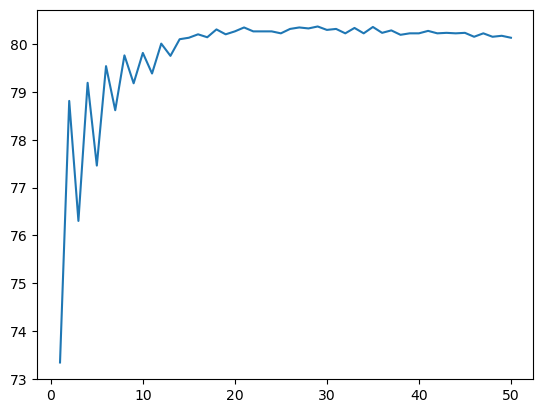

In [41]:
import matplotlib.pyplot as plt
plt.plot(k_values,a)